<a href="https://colab.research.google.com/github/Alevtina529/test/blob/main/noshowappointments_cometml_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Настройка CometML
<img src='https://camo.githubusercontent.com/b35adf34bc440ea2ac19bb0d3432f48e26d71ab8e4c256e936b709eec44f5b19/68747470733a2f2f7777772e636f6d65742e6d6c2f696d616765732f6c6f676f5f636f6d65745f6c696768742e706e67' width=500px>

In [2]:
!pip install comet_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.9/561.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.8/218.8 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.2/512.2 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.6.2
    Uninstalling websocket-client-1.6.2:
      Successfully uninstalled websocket-client-1.6.2
  Attempting uninstall: python-box
    Found existing installation: python-box 7.1.1
    Uninstalling python-box-7.1.1:
      Successfully uninstalled python-box-7.1.1


In [3]:
from comet_ml import Experiment

In [4]:
# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key='Be2mJLRylM5XPz9LUciXyZkmL',
    project_name='medical-appointment',
    workspace='alevtina',
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/alevtina/medical-appointment/30e4a12719954d56bc1747c9549197fd



# Загрузка данных

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
cvs_f='/content/drive/MyDrive/Colab/dataset/KaggleV2-May-2016.csv'
df = pd.read_csv(cvs_f)

In [18]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
numeric_data=df

In [9]:
numeric_data.drop(['AppointmentID', 'PatientId', 'ScheduledDay', 'AppointmentDay', 'No-show','Gender','Neighbourhood'],axis=1, inplace = True)

In [10]:
numeric_data

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,62,0,1,0,0,0,0
1,56,0,0,0,0,0,0
2,62,0,0,0,0,0,0
3,8,0,0,0,0,0,0
4,56,0,1,1,0,0,0
...,...,...,...,...,...,...,...
110522,56,0,0,0,0,0,1
110523,51,0,0,0,0,0,1
110524,21,0,0,0,0,0,1
110525,38,0,0,0,0,0,1


# Визуализация

### Распределение числовых признаков

{'web': 'https://www.comet.com/api/image/download?imageId=8814d6bc367a42128252ed8d89616530&experimentKey=30e4a12719954d56bc1747c9549197fd',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=8814d6bc367a42128252ed8d89616530&experimentKey=30e4a12719954d56bc1747c9549197fd',
 'imageId': '8814d6bc367a42128252ed8d89616530'}

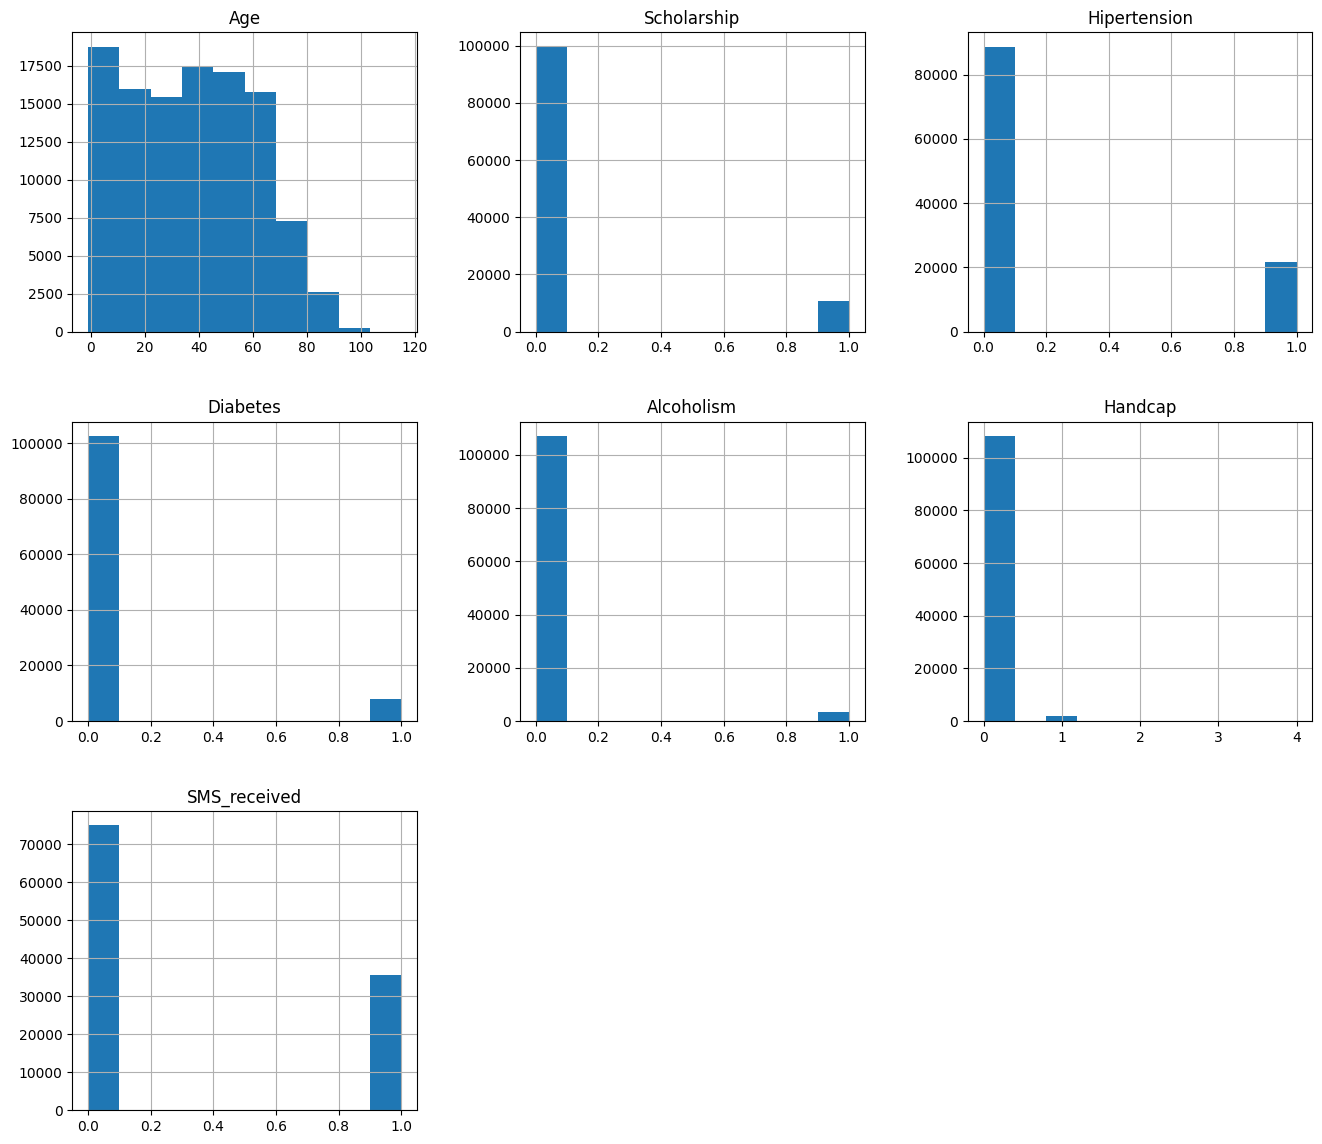

In [12]:
numeric_data.hist(figsize=(16,14));
#логируем гистограмму
experiment.log_figure(figure=plt)

*Проанализируем число людей каждого возраста*

In [ ]:
print("Уникальные значения в `Age` => {}".format(numeric_data.Age.unique()))

Уникальные значения в `Age` => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 100  99]


In [ ]:
# Удалим аномальные значения
numeric_data= numeric_data[(df.Age >= 0) & (df.Age <= 110)]
numeric_data.Age.value_counts()

<ipython-input-62-7f7ba63bf518>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  numeric_data= numeric_data[(df.Age >= 0) & (df.Age <= 110)]


0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
97       11
98        6
100       4
102       2
99        1
Name: Age, Length: 102, dtype: int64

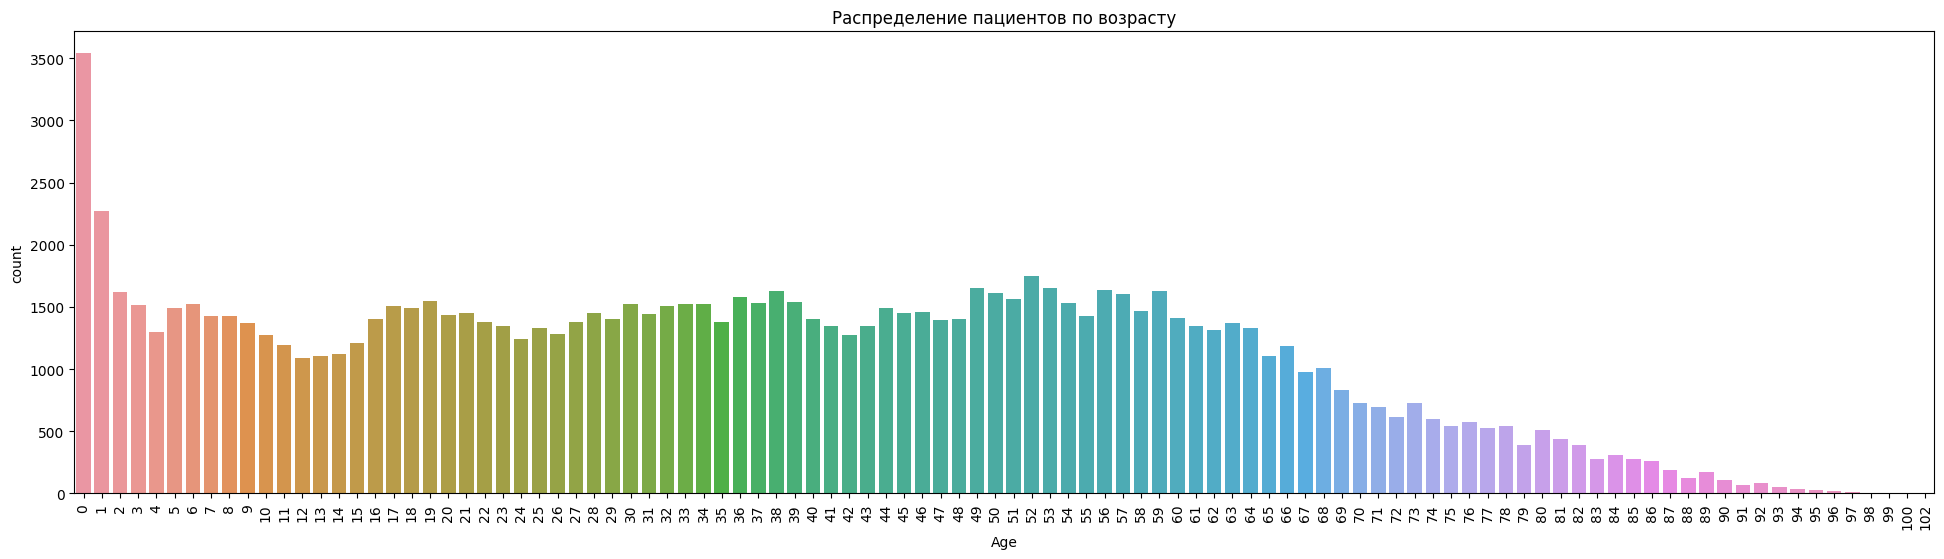

In [ ]:
plt.figure(figsize=(24,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=numeric_data.Age)
ax.set_title("Распределение пациентов по возрасту")
experiment.log_figure(figure=plt)
plt.show()

In [13]:
import seaborn as sns

{'web': 'https://www.comet.com/api/image/download?imageId=8dbf0b51f8d64eb8ba0f6aa8b139cff1&experimentKey=30e4a12719954d56bc1747c9549197fd',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=8dbf0b51f8d64eb8ba0f6aa8b139cff1&experimentKey=30e4a12719954d56bc1747c9549197fd',
 'imageId': '8dbf0b51f8d64eb8ba0f6aa8b139cff1'}

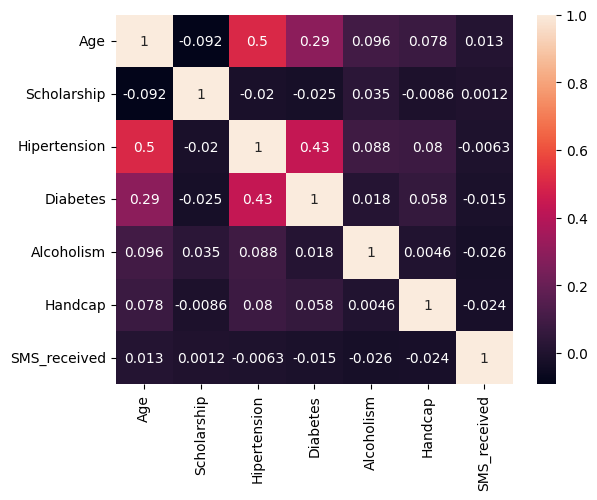

In [14]:
sns.heatmap(numeric_data.corr(),annot = True)
#логируем гистограмму
experiment.log_figure(figure=plt)

# Придет ли пациент на назначенный приием?

In [16]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Age           110527 non-null  int64
 1   Scholarship   110527 non-null  int64
 2   Hipertension  110527 non-null  int64
 3   Diabetes      110527 non-null  int64
 4   Alcoholism    110527 non-null  int64
 5   Handcap       110527 non-null  int64
 6   SMS_received  110527 non-null  int64
dtypes: int64(7)
memory usage: 5.9 MB


## Кодировка категориальных признаков

In [19]:
y = df['No-show']

In [20]:
y

0         No
1         No
2         No
3         No
4         No
          ..
110522    No
110523    No
110524    No
110525    No
110526    No
Name: No-show, Length: 110527, dtype: object

In [21]:
y = y.replace({'No': 0, 'Yes': 1})

In [22]:
y.value_counts(True)

0    0.798067
1    0.201933
Name: No-show, dtype: float64

## Шкалирование данных

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
X = scaler.fit_transform(numeric_data)

In [25]:
print(X.shape)

(110527, 7)


# Модель (этот раздел будет подробно изучен далее в курсе)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Инициализация модели

In [27]:
logreg = LogisticRegression()

In [28]:
random_state = 42

### Обучение модели

In [29]:
logreg.fit(X, y)

LogisticRegression()

#### Логирование параметров обучения

In [30]:
params={"random_state":random_state,
        "model_type":"logreg"
}

In [31]:
experiment.log_parameters(params)

### Предсказания модели

In [32]:
y_pred = logreg.predict(X)

### Анализ модели

In [33]:
accuracy = accuracy_score(y, y_pred)

print("Доля правильных ответов: {:6.3f}".format(accuracy))

Доля правильных ответов:  0.798


# Логирование метрик

In [34]:
metrics = {"accuracy":accuracy}

In [35]:
experiment.log_metrics(metrics)

<img src = 'https://miro.medium.com/max/1400/0*r2yYhe2DpE4d3WKP.png' width=700px>

In [36]:
experiment.log_confusion_matrix(y.tolist(), y_pred.tolist())

{'web': 'https://www.comet.com/api/asset/download?assetId=04de3da429d64616a77bf6b7443be3b0&experimentKey=30e4a12719954d56bc1747c9549197fd',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=04de3da429d64616a77bf6b7443be3b0&experimentKey=30e4a12719954d56bc1747c9549197fd',
 'assetId': '04de3da429d64616a77bf6b7443be3b0'}

In [37]:
experiment.display()

In [38]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/alevtina/medical-appointment/30e4a12719954d56bc1747c9549197fd
COMET INFO:   Metrics:
COMET INFO:     accuracy : 0.798067440534892
COMET INFO:   Parameters:
COMET INFO:     C                 : 1.0
COMET INFO:     class_weight      : 1
COMET INFO:     clip              : False
COMET INFO:     copy              : True
COMET INFO:     dual              : False
COMET INFO:     feature_range     : (0, 1)
COMET INFO:     fit_intercept     : True
COMET INFO:     intercept_scaling : 1
COMET INFO:     l1_ratio          : 1
COMET INFO:     max_iter          : 100
COMET INFO:     model_type        : logreg
COMET INFO:     multi_class       

# Домашнее задание

Визуализируйте корреляцию между числовыми признаками, использованными для обучения модели и залогируйте изображение в Comet.

В качестве ответа приложите обновленный ноутбук.

*Форма оценки ментором:*

1) Проведена визуализация корреляции между 7 числовыми признаками, использованными для обучения модели - 5 баллов

2) Произведено логирование графика в CometMl - 10 баллов

